<a href="https://colab.research.google.com/github/ndan1/final-project-big-data-analysis/blob/main/mainm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from prophet import Prophet
from scipy import stats

c:\Users\Lindan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [79]:
#read data
data = pd.read_csv('Data_Penjualan_Aki.csv')
data

,tanggal,jumlah,nama_barang,pemesan,harga
0,1/6/2023,2,N100,Maju Jaya,3190000
1,1/6/2023,2,NS70,Maju Jaya,2214000
2,1/7/2023,2,N150,Juniarta,6741000
3,1/7/2023,1,N120,Hasta,1870000
4,1/9/2023,1,N50,NE Genset Bali,691000
...,...,...,...,...,...
218,9/25/2023,2,N70,Arif,2116000
219,9/25/2023,2,NS70,Maju Jaya,2290000
220,9/26/2023,2,NS70,Bambang,2086000
221,9/26/2023,1,N70,Brabus,1185000


In [80]:
#informasi data
data.info()
data.describe() #statistik deskriptif dari kolom numerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      223 non-null    object
 1   jumlah       223 non-null    int64 
 2   nama_barang  223 non-null    object
 3   pemesan      223 non-null    object
 4   harga        223 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 8.8+ KB


,jumlah,harga
count,223.000000,2.230000e+02
mean,1.466368,2.073413e+06
std,0.583164,1.680931e+06
min,1.000000,1.700000e+05
25%,1.000000,1.073500e+06
50%,1.000000,1.541000e+06
75%,2.000000,2.381500e+06
max,4.000000,9.069000e+06


In [81]:
#klasifikasi data berdasarkan nama barang dan jumlah
barang_laris = data.groupby('nama_barang')['jumlah'].sum().sort_values(ascending=False)

#mengambil 10 paling laku dan tidak laku
top_10_laris = barang_laris.head(10)
bottom_10_laris = barang_laris.tail(10)

In [82]:
print("10 Barang Terlaris:")
print(top_10_laris)

print("\n10 Barang Tidak Laris:")
print(bottom_10_laris)

10 Barang Terlaris:
nama_barang
N120     46
N100     45
N70      35
NS40Z    30
NS60     24
N150     21
NS70     21
N50      19
N200     18
N50Z     18
Name: jumlah, dtype: int64

10 Barang Tidak Laris:
nama_barang
GTZ5S    9
NX110    7
NX120    7
NS120    5
NS40     2
N70ZL    2
N60      2
NX100    2
NS60Z    1
N50ZL    1
Name: jumlah, dtype: int64


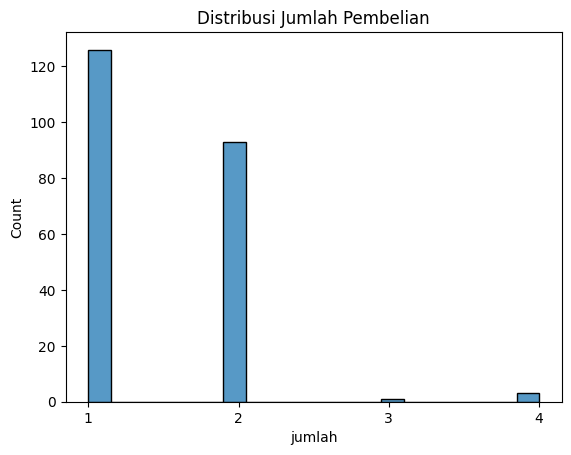

In [83]:
#visualisasi distribusi jumlah pembelian
sns.histplot(data['jumlah'], bins=20)
plt.title('Distribusi Jumlah Pembelian')
plt.xticks([1, 2, 3, 4])
plt.show()

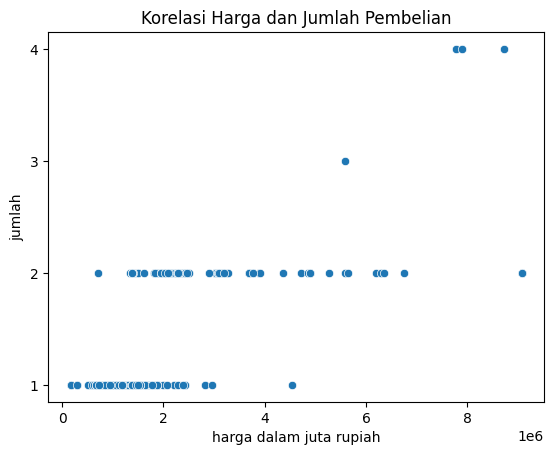

In [84]:
#analisis korelasi antara harga dan jumlah
sns.scatterplot(x='harga', y='jumlah', data=data)
plt.title('Korelasi Harga dan Jumlah Pembelian')
plt.xlabel('harga dalam juta rupiah')
plt.yticks([1, 2, 3, 4])
plt.show()

In [85]:
#analisa tren penjualan
data['tanggal'] = pd.to_datetime(data['tanggal'], format='%m/%d/%Y')
penjualan_per_tanggal = data.groupby('tanggal')['jumlah'].sum() # Kelompokkan data berdasarkan tanggal dan jumlahkan

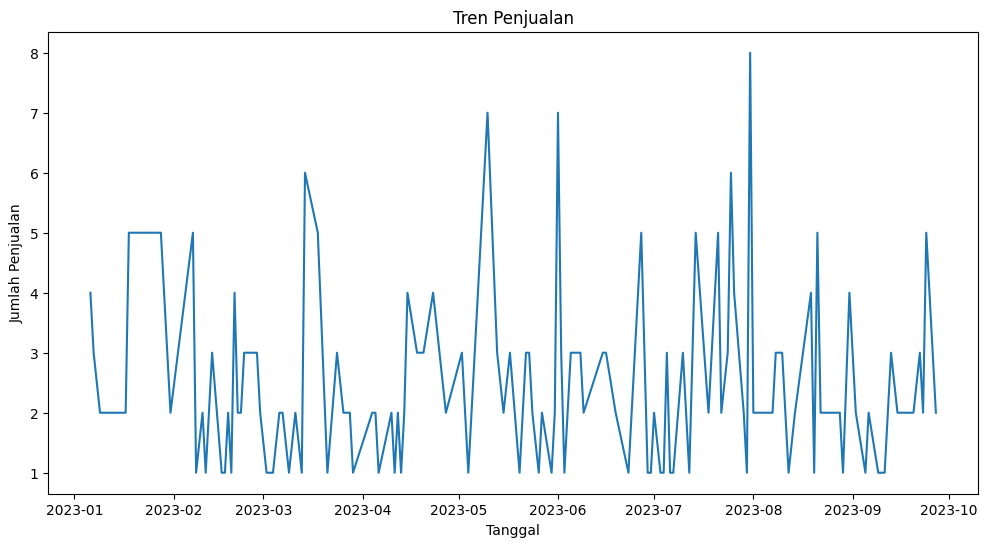

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(penjualan_per_tanggal.index, penjualan_per_tanggal.values)
plt.title('Tren Penjualan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [87]:
#mengelompokkan pelanggan berdasarkan frekuensi pembelian
frekuensi_pembelian = data.groupby('pemesan')['nama_barang'].count()

#kategori kondisi
def segmentasi_pelanggan(x):
    if x > 15:
        return 'Frequent Buyer'
    elif x > 5:
        return 'Occasional Buyer'
    else:
        return 'One-time Buyer'

In [88]:
data['segmentasi'] = data['pemesan'].map(frekuensi_pembelian).map(segmentasi_pelanggan)
print(data[['pemesan', 'segmentasi']])

            pemesan        segmentasi
0         Maju Jaya    Frequent Buyer
1         Maju Jaya    Frequent Buyer
2          Juniarta  Occasional Buyer
3             Hasta  Occasional Buyer
4    NE Genset Bali    Frequent Buyer
..              ...               ...
218            Arif  Occasional Buyer
219       Maju Jaya    Frequent Buyer
220         Bambang  Occasional Buyer
221          Brabus    One-time Buyer
222           Damar  Occasional Buyer

[223 rows x 2 columns]


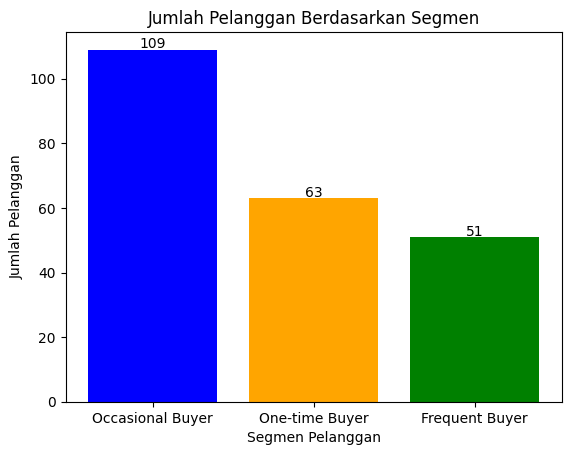

In [89]:
segmen_counts = data['segmentasi'].value_counts()

# Membuat chart table
fig, ax = plt.subplots()
ax.bar(segmen_counts.index, segmen_counts.values, color=['blue', 'orange', 'green'])
ax.set_title('Jumlah Pelanggan Berdasarkan Segmen')
ax.set_xlabel('Segmen Pelanggan')
ax.set_ylabel('Jumlah Pelanggan')

# Menampilkan angka di atas bar
for i, v in enumerate(segmen_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.show()

Forecasting prediksi penjualan

In [90]:
data_daily = data.groupby('tanggal')['jumlah'].sum().reset_index()
data_daily

,tanggal,jumlah
0,2023-01-06,4
1,2023-01-07,3
2,2023-01-09,2
3,2023-01-10,2
4,2023-01-11,2
...,...,...
128,2023-09-23,2
129,2023-09-24,5
130,2023-09-25,4
131,2023-09-26,3


In [91]:
data_daily.columns = ['ds', 'y']
# prophet memerlukan 2 kolom untuk melakukan prediksi, ds untuk tanggal, dan y untuk jumlah

In [92]:
model = Prophet() # memuat model prophet
model.fit(data_daily) #melatih model dengan data yang sudah diproses sebelumnya

11:35:00 - cmdstanpy - INFO - Chain [1] start processing
11:35:00 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
future = model.make_future_dataframe(periods=400)
# membuat dataframe baru dengan tanggal 400 hari ke depan. Tanggal tersebut akan digunakan untuk prediksi

In [94]:
forecast = model.predict(future)
# menghasilkan prediksi 400 hari ke depan dari dataframe yang baru saja dibuat

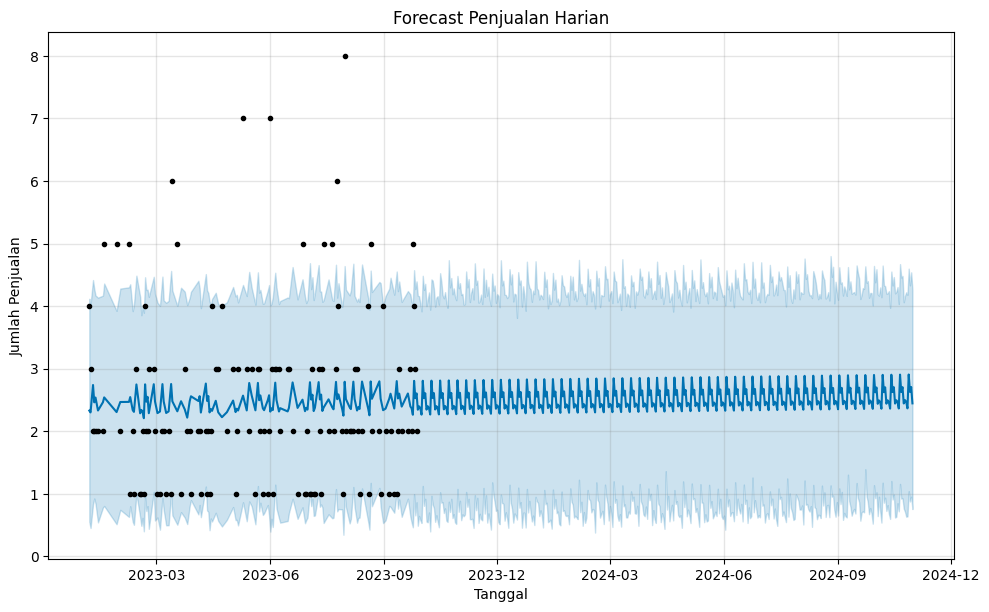

In [95]:
fig = model.plot(forecast)
plt.title('Forecast Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.show()
# membuat hasil prediksi dalam grafik